In [2]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import display, clear_output
# import ipywidgets.interact class, this class will represent a slide bar.
from ipywidgets import interact
from matplotlib.colors import LinearSegmentedColormap
%matplotlib notebook

From:

[Landis, Geoffrey A. "The Fermi paradox: an approach based on percolation theory." Journal of the british interplanetary society 51.5 (1998): 163-166](http://www.geoffreylandis.com/percolation.htp)


Space is a 3D grid. each cell of the grid ( a sector) is linked to its 6 immediate Von Numan neighbours. Each sector can be in one of three states:
 
1: Uncolonized
 
2: Colonised by colonising colony
 
3: Colonised by a non colonising colony

Algorithm:
 
Each colonising colony searches its 6 immediate sectors for an uncolonized sector. If one is found then it is colonised with a colonising colony with a probability of p and a a non colonising colony with a probability 1-p



Sector class

This is a unit of 3d space

It contains a state and a link to its 6 imediate neighbours

Attributes

            colonized -> int

            x_pos ->int

            y_pos ->int

            z_pos ->int

            neighbours-> list of Space

            capasity -> boolean # if there are no empty neighbours

Methods

            add_neighbour

            colonize

            get_pos -> x,y,z


In [3]:
class Sector:
    colinising = 0.5
    def __init__(self,x_pos,y_pos,z_pos):
        self.id = str(x_pos)+":"+str(y_pos)+":"+str(z_pos)
        self.x_pos = x_pos + 0.5-rnd.random()
        self.y_pos = y_pos + 0.5-rnd.random()
        self.z_pos = z_pos + 0.5-rnd.random()
        self.neighbours =[]
        self.colonized=0

    def add_neighbour(self,sector):
        self.neighbours.append(sector)

    def colonize(self):
        if len(self.neighbours)>0:
            sector = rnd.choice(self.neighbours)
            while sector.colonized>0 and len(self.neighbours)>0:
                self.neighbours.remove(sector)
                if len(self.neighbours)>0:
                    sector = rnd.choice(self.neighbours)
                else:
                    return False, False
            if rnd.random()<Sector.colinising:
                sector.colonized=1
            else:
                sector.colonized=2
            self.neighbours.remove(sector)
            return sector,len(self.neighbours)>0
        else:
             return False,False

    def get_pos(self):
        return self.x_pos,self.y_pos,self.z_pos,self.colonized

        

Space class


Attributes

            size -> int
            
            colonies -> list of Space

            space_faring -> list of Space

            space_chart ->list of np lists (x,y,z,c)


Methods

            init_space

            iterate

            plot


In [4]:
from itertools import starmap
class Space:
    def __init__(self,size) -> None:
        def bounds(v):
            if v>=size: 
                return False
            if v<0:
                return False
            return True
            
        self.size = size
        # crate sectors and link in network
        temp_space=[]
        for x in range(size):
            temp_space.append([])
            for y in range(size):
                temp_space[x].append([])
                for z in range(size):
                    temp_space[x][y].append(Sector(x,y,z))
        for x in range(1,size-1):
            for y in range(1,size-1):
                for z in range(1,size-1):
                    temp_space[x][y][z].add_neighbour(temp_space[x-1][y][z]) 
                    temp_space[x][y][z].add_neighbour(temp_space[x+1][y][z]) 
                    temp_space[x][y][z].add_neighbour(temp_space[x][y-1][z]) 
                    temp_space[x][y][z].add_neighbour(temp_space[x][y+1][z]) 
                    temp_space[x][y][z].add_neighbour(temp_space[x][y][z-1]) 
                    temp_space[x][y][z].add_neighbour(temp_space[x][y][z+1]) 
        
        home_world = temp_space[x//2][y//2][z//2] 
        self.colonies = [home_world]
        self.space_faring = [home_world]
        x,y,z,c = home_world.get_pos()
        self.star_map = [np.array([x]),np.array([y]),np.array([z]),np.array([c])]

    def iterate(self):
        
        new_worlds = []
        settled = []

        for c in self.space_faring:
            new_world,colony = c.colonize()
            if new_world != False:
                self.colonies.append(new_world)
                x,y,z,c = new_world.get_pos()
                self.star_map[0] = np.append(self.star_map[0],x)
                self.star_map[1] = np.append(self.star_map[1],y)
                self.star_map[2] = np.append(self.star_map[2],z)
                self.star_map[3] = np.append(self.star_map[3],c)
                if new_world.colonized==1:
                    new_worlds.append(new_world)



        for n in new_worlds:
            self.space_faring.append(n)

                    
    

In [5]:
def plot(data,size):
    fig = plt.figure(figsize=(5, 5))
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    # defining axes
    cmap = LinearSegmentedColormap.from_list('mycmap', ['maroon', 'grey'])
    ax.scatter(data[0],data[1],data[2], c = data[3],cmap=cmap,s =1 )
    #syntax for plotting
    ax.set_title('Space')
    plt.axis('off')
    ax.set_xlim3d(0,size)
    ax.set_ylim3d(0,size)
    ax.set_zlim3d(0,size)
 
    plt.show()

<IPython.core.display.Javascript object>


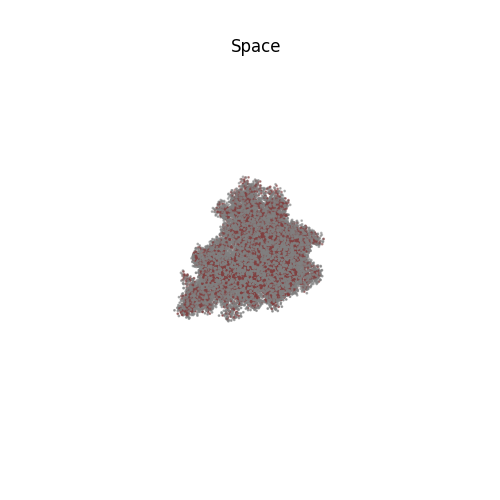

In [6]:
Sector.colinising=0.34
size =80
exp = Space(size)
for _ in range(150):
    exp.iterate()
plot(exp.star_map,size)
